In [1]:
# Import the Pandas, numpy, matplotlib,sklearn and Seaborn library
import numpy as np 
import pandas as pd 
import seaborn as sns 
from pandas import DataFrame, Series
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve

# Add items for matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

# Read the Mushroom Dataset file into a Pandas DataFrame
mushroom_data = pd.read_table("https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data", sep= ",", header = None)

# Display the DataFrame
mushroom_data.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
# Create a new DataFrame with specific columns from the old DataFrame
mushrooms = mushroom_data.iloc[: , [0, 4, 5, 21, 22]].copy()

#Display the DataFrame
mushrooms.head()

,0,4,5,21,22
0,p,t,p,s,u
1,e,t,a,n,g
2,e,t,l,n,m
3,p,t,p,s,u
4,e,f,n,a,g


In [5]:
# Rename all columns in the mushroom_fin Dataset
mushrooms.columns = ['Mushroom_Class', 'Mushroom_Bruises', 'Mushroom_Odor', 'Mushroom_Population','Mushroom_Habitat']

# Display the DataFrame
mushrooms.head()

,Mushroom_Class,Mushroom_Bruises,Mushroom_Odor,Mushroom_Population,Mushroom_Habitat
0,p,t,p,s,u
1,e,t,a,n,g
2,e,t,l,n,m
3,p,t,p,s,u
4,e,f,n,a,g


In [7]:
mushrooms = mushrooms.astype('category')
mushrooms.dtypes

Mushroom_Class         category
Mushroom_Bruises       category
Mushroom_Odor          category
Mushroom_Population    category
Mushroom_Habitat       category
dtype: object

In [9]:
labelencoder=LabelEncoder()
for column in mushrooms.columns:
    mushrooms[column] = labelencoder.fit_transform(mushrooms[column])

mushrooms.head()

,Mushroom_Class,Mushroom_Bruises,Mushroom_Odor,Mushroom_Population,Mushroom_Habitat
0,1,1,6,3,5
1,0,1,0,2,1
2,0,1,3,2,3
3,1,1,6,3,5
4,0,0,5,0,1


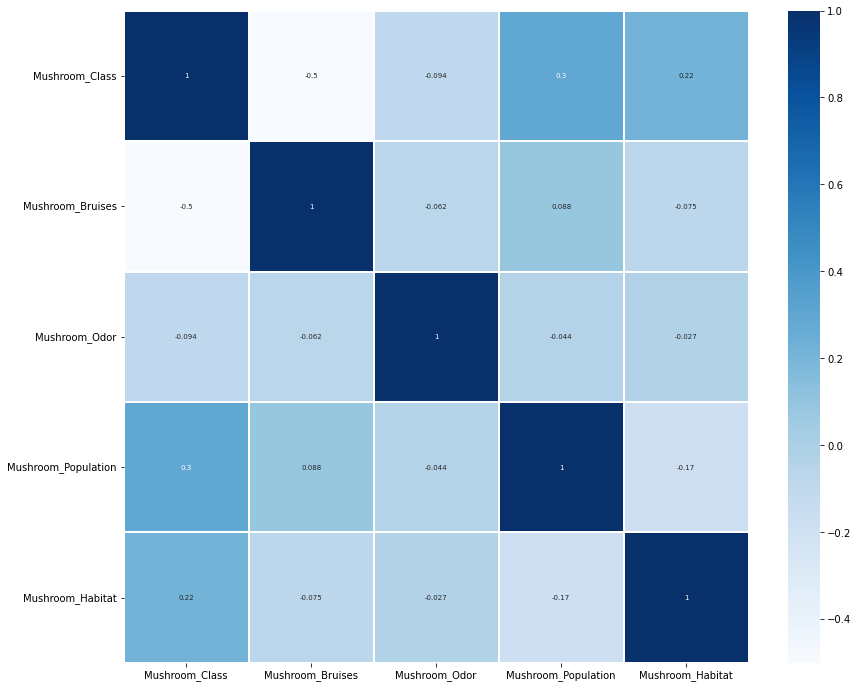

In [17]:
# Visualize the count of edible and poisonous mushrooms
plt.figure(figsize=(14,12))
sns.heatmap(mushrooms.corr(),linewidths=.1,cmap="Blues", annot=True, annot_kws={"size": 7})
plt.yticks(rotation=0);

In [13]:
# Correlation between Mushroom Class & Mushroom Odor
mushrooms[['Mushroom_Class', 'Mushroom_Odor']].groupby(['Mushroom_Odor'], as_index=False).mean().sort_values(by='Mushroom_Class', ascending=False)

,Mushroom_Odor,Mushroom_Class
1,1,1.000000
2,2,1.000000
4,4,1.000000
6,6,1.000000
7,7,1.000000
8,8,1.000000
5,5,0.034014
0,0,0.000000
3,3,0.000000


C:\Users\ateik\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\ateik\anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\ateik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


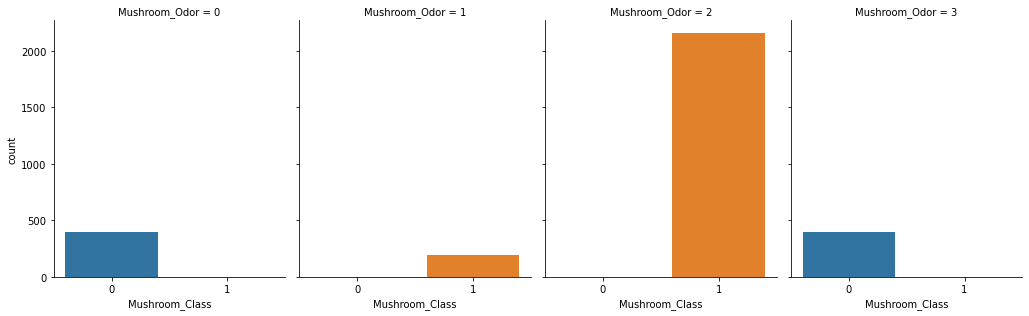

In [20]:
mushroom_new = mushrooms[['Mushroom_Class', 'Mushroom_Odor']]
mushroom_new = mushroom_new[mushroom_new['Mushroom_Odor']<=3.5]
sns.factorplot('Mushroom_Class', col='Mushroom_Odor', data=mushroom_new, kind='count', size=4.5, aspect=.8, col_wrap=4);

C:\Users\ateik\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\ateik\anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\ateik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


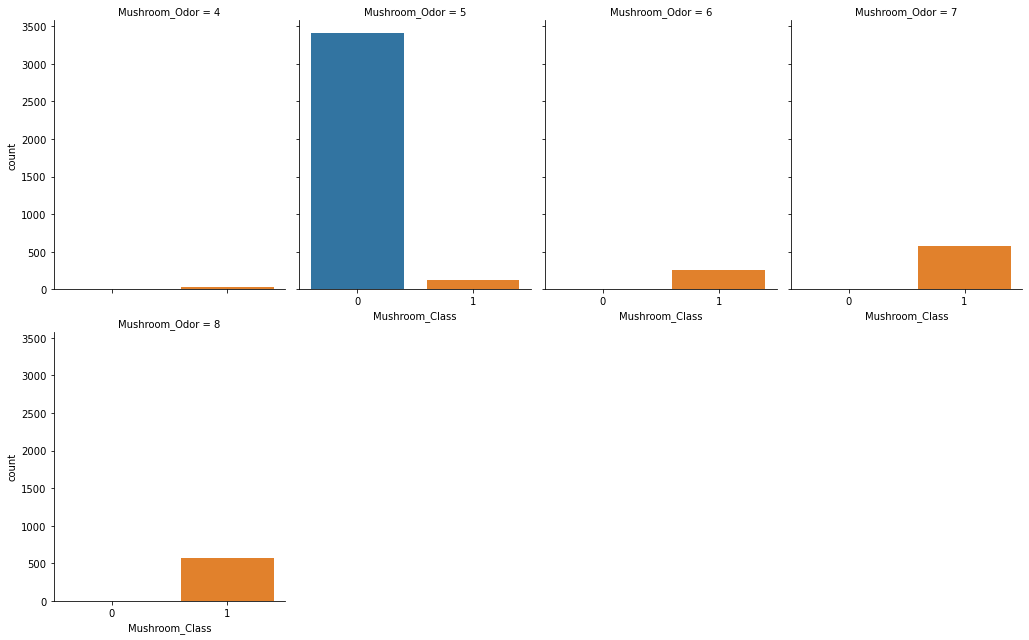

In [22]:
mushroom_new=mushrooms[['Mushroom_Class', 'Mushroom_Odor']]
mushroom_new=mushroom_new[mushroom_new['Mushroom_Odor']>3.5]
sns.factorplot('Mushroom_Class', col='Mushroom_Odor', data=mushroom_new, kind='count', size=4.5, aspect=.8, col_wrap=4);

In [28]:
X = mushrooms.drop(["Mushroom_Class"], axis=1)
y = mushrooms["Mushroom_Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

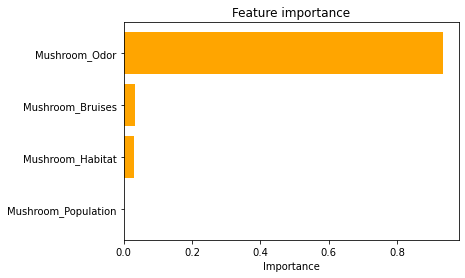

In [34]:
features_list = X.columns.values
feature_importance = dt.feature_importances_
sorted_idx = np.argsort(feature_importance)
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center', color ="orange")
plt.yticks(range(len(sorted_idx)), features_list[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature importance')
plt.draw()

plt.show()

In [39]:
# Decision Tree Classifier report
y_pred_dt = dt.predict(X_test)
print("Decision Tree Classifier report: \n\n", classification_report(y_test, y_pred_dt))
print("Test Accuracy: {}%".format(round(dt.score(X_test, y_test)*100, 2)))

Decision Tree Classifier report: 

               precision    recall  f1-score   support

           0       1.00      0.99      1.00       433
           1       0.99      1.00      1.00       380

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813

Test Accuracy: 99.63%


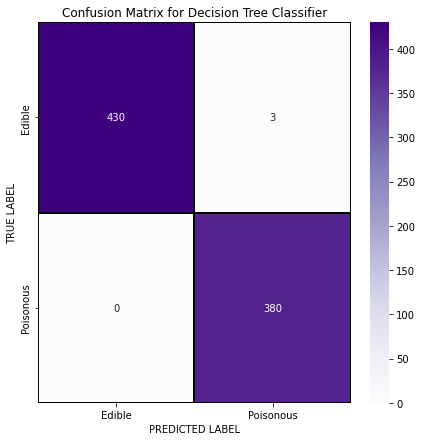

In [56]:
# Confusion Matrix for Decision Tree Classifier
cm = confusion_matrix(y_test, y_pred_dt)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

C:\Users\ateik\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\ateik\anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\ateik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


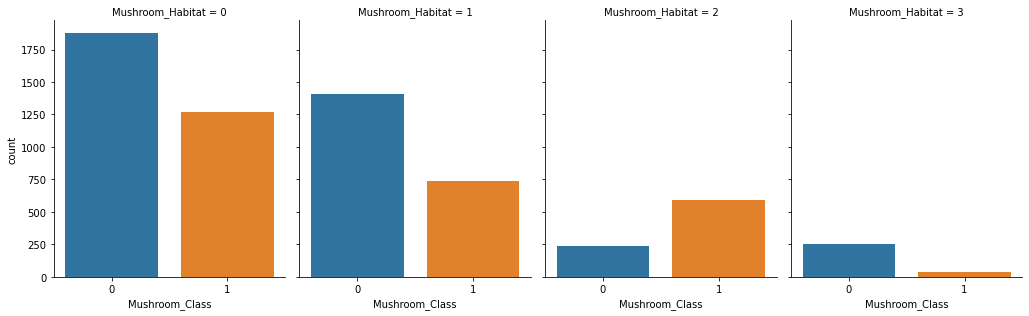

In [57]:
mushroom_new = mushrooms[['Mushroom_Class', 'Mushroom_Habitat']]
mushroom_new = mushroom_new[mushroom_new['Mushroom_Habitat']<=3.5]
sns.factorplot('Mushroom_Class', col='Mushroom_Habitat', data=mushroom_new, kind='count', size=4.5, aspect=.8, col_wrap=4);

C:\Users\ateik\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\ateik\anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\ateik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


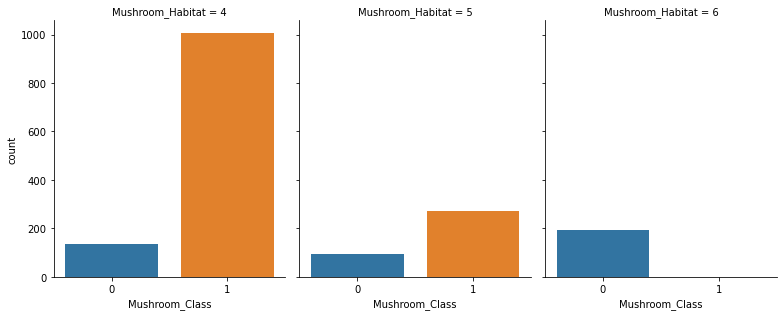

In [58]:
mushroom_new=mushrooms[['Mushroom_Class', 'Mushroom_Habitat']]
mushroom_new=mushroom_new[mushroom_new['Mushroom_Habitat']>3.5]
sns.factorplot('Mushroom_Class', col='Mushroom_Habitat', data=mushroom_new, kind='count', size=4.5, aspect=.8, col_wrap=4);

In [59]:
X = mushrooms.drop(["Mushroom_Class"], axis=1)
y = mushrooms["Mushroom_Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

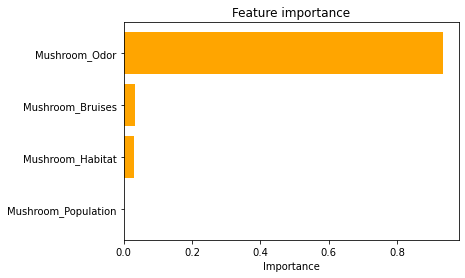

In [60]:
features_list = X.columns.values
feature_importance = dt.feature_importances_
sorted_idx = np.argsort(feature_importance)
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center', color ="orange")
plt.yticks(range(len(sorted_idx)), features_list[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature importance')
plt.draw()

plt.show()

In [ ]:
# In conclusion, as predicted the mushroom odor is heavily important when decisding whether a mushroom is edible or not.